In [5]:
import os
import glob
import pandas as pd
import numpy as np

# Define the folder containing your CSV files
folder_path = "DecodingResults"
pattern = os.path.join(folder_path, "sub-*_ses-*_confusion_matrix.csv")

# Find all matching files
csv_files = glob.glob(pattern)

# Load and aggregate confusion matrices
confusion_matrices = []
for file in csv_files:
    df = pd.read_csv(file)
    confusion_matrices.append(df.values)

# Convert to numpy array and sum
aggregated_confusion = np.sum(confusion_matrices, axis=0)

# Optional: convert back to DataFrame for readability
labels = pd.read_csv(csv_files[0], index_col=0).columns  # Assuming labels are the same in all
#aggregated_df = pd.DataFrame(aggregated_confusion, index=labels, columns=labels)

# Save or print the aggregated matrix
#aggregated_df.to_csv("aggregated_confusion_matrix.csv")
#print(aggregated_df)


In [7]:
aggregated_confusion

array([[2001,   87,  106],
       [ 327, 1549,  319],
       [ 385,  430, 1380]])

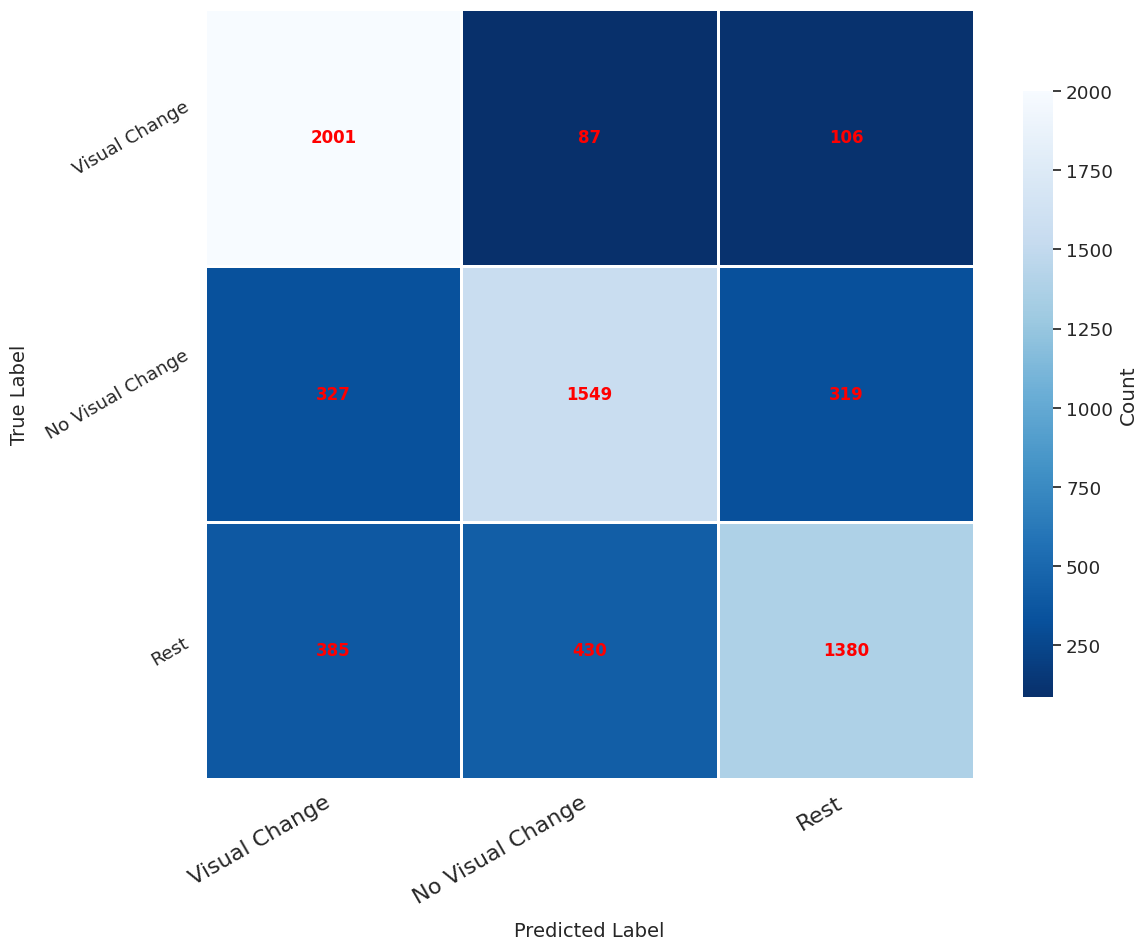

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the aggregated confusion matrix

# Set up the plot
new_labels = ["Visual Change", "No Visual Change", "Rest"]

# Rename rows and columns
#aggregated_confusion.co = new_labels
aggregated_confusion = pd.DataFrame(aggregated_confusion, columns=new_labels)
aggregated_confusion.index = new_labels

sns.set_theme(
    context="notebook",         # “notebook” context = slightly larger fonts
    style="whitegrid",          # white background with faint grid
    font_scale=1.2              # scale up all fonts by 1.2×
)

cmap_choice = "Blues_r"  # reverse Blues so that higher counts are darker blue

plt.figure(figsize=(12, 10))

# If you want to annotate percentages instead of raw counts, comment out the next two lines
# and uncomment the “percent_matrix” lines below.
#
#   percent_matrix = aggregated_confusion / aggregated_confusion.sum(axis=1).values[:, None]
#   annot_matrix = percent_matrix.applymap(lambda x: f"{x:.2%}")

# Otherwise, annotate with raw integer counts:
annot_matrix = aggregated_confusion.astype(int)

sns.heatmap(
    aggregated_confusion,
    annot=annot_matrix,         # display numbers (or percentages) in each cell
    fmt="d",                    # integer format; use ".2%" if annot_matrix holds strings
    cmap=cmap_choice,
    cbar=True,
    cbar_kws={
        "shrink": 0.75,         # make the color bar a bit shorter
        "format": "%d",         # integer ticks on color bar
        "label": "Count"        # label for color bar
    },
    linewidths=1,               # white lines between cells
    linecolor="white",
    square=True,                # cells are square
    annot_kws={
        "weight": "bold",       # make annotation text bold
        "color": "red",       # change to "white" if very dark background
        "size": 12
    }
)

# ─── Titles and Axis Labels ────────────────────────────────────────────────────
#plt.title("Aggregated Confusion Matrix", fontsize=18, weight="bold", pad=20)
plt.xlabel("Predicted Label", fontsize=14, labelpad=10)
plt.ylabel("True Label", fontsize=14, labelpad=10)

# ─── Ticks and Layout ──────────────────────────────────────────────────────────
plt.xticks(rotation=30, ha="right", fontsize=16)
plt.yticks(rotation=30)
plt.tight_layout()

# ─── Save or Show ──────────────────────────────────────────────────────────────
plt.savefig("final/cm_attractive.png", dpi=600)
plt.show()